In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel(r'Downloads\spreadsheet_data.xlsx')

In [3]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [4]:
df.info() # Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Review    6393 non-null   object        
 1   date      6448 non-null   datetime64[ns]
 2   Location  1711 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 151.2+ KB


In [5]:
df.shape #shape of the dataset

(6448, 3)

In [6]:
# Checking Null values
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

You can see There is many null values.

In [7]:
# Removing Null values from Column Review beacuase it have only 55 which is very very less as comapre to 6448 rows.
df=df.dropna(axis=0,subset=['Review'])

In [8]:
df.isnull().sum() 

Review         0
date           0
Location    4688
dtype: int64

### In the location column you can see 4737 null values if we remove all of them it will have a direct impact into our further calculation. So we try to fill that null values.


In [9]:
# Filling Null values with most common location of the location column. Because mode is best for categorical feature.
df['Location']=df['Location'].fillna(df['Location'].value_counts().index[0])

In [10]:
df.isnull().sum()

Review      0
date        0
Location    0
dtype: int64

# Data Visualization:



In [16]:
#  From Which Location maximum times the reviwes are came.
df['Location'].value_counts()

United States of America    4804
New York                      34
San Jose                      19
California                    19
Florida                       16
                            ... 
New Bedford, MA                1
Antioch ca                     1
orlando, Florida               1
Wash DC                        1
Apollo Beach                   1
Name: Location, Length: 1078, dtype: int64

Results1: Maximum times the reviwes are came from the location United States of America .

## Apply Feature Engineering on "Date" feature.



In [17]:
df['date']=df['date'].dt.strftime('%Y-%d-%m') # convert Datetime to object datatype

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6393 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6393 non-null   object
 2   Location  6393 non-null   object
dtypes: object(3)
memory usage: 519.8+ KB


You can see date is now changed datetime to object.

In [19]:
# make a different column year, month,date from the feature 'date'
df['Year']=df['date'].apply(lambda x:x.split('-')[0])

In [21]:
df['Month']=df['date'].apply(lambda x:x.split('-')[2])

In [23]:
df['Date']=df['date'].apply(lambda x:x.split('-')[1])

In [25]:
df=df.drop('date',axis=1) #drop date column

In [26]:
df.head()

,Review,Location,Year,Month,Date
0,I was very impressed with the resort.\n Great ...,Sebastian,2019,08,20
1,The rooms were nice the outside needs work als...,Los Angeles,2019,08,20
2,Great location! I have stayed at this hotel on...,Georgia,2019,08,20
3,The hotel was adequate for my stay. The strips...,United States of America,2019,08,20
4,"Great location, room was large and spacious. P...",Palm Harbor,2019,08,19


In [27]:
## Change the data type of "Date,Year, Month" from object to integer
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6393 entries, 0 to 6447
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   Location  6393 non-null   object
 2   Year      6393 non-null   int32 
 3   Month     6393 non-null   int32 
 4   Date      6393 non-null   int32 
dtypes: int32(3), object(2)
memory usage: 544.8+ KB


<AxesSubplot:xlabel='Year', ylabel='count'>

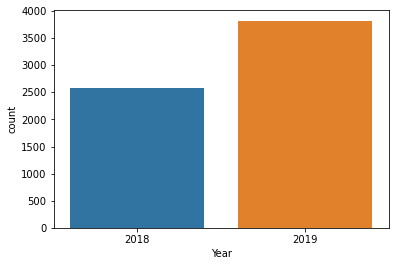

In [30]:
# year wise reviews came.
sns.countplot(x='Year',data=df)

Result2:
    You can see from 2019 maximum no of times the revies came as compare to the year 2018

<AxesSubplot:xlabel='Month', ylabel='count'>

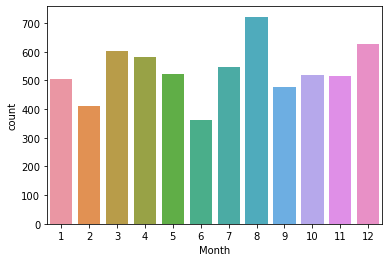

In [31]:
# Month wise reviews came.
sns.countplot(x='Month',data=df)

Results3: From month 8 that is 'August' the reviews came maximum time and from  6 i.e June month very less reviews came.

<AxesSubplot:xlabel='Date', ylabel='count'>

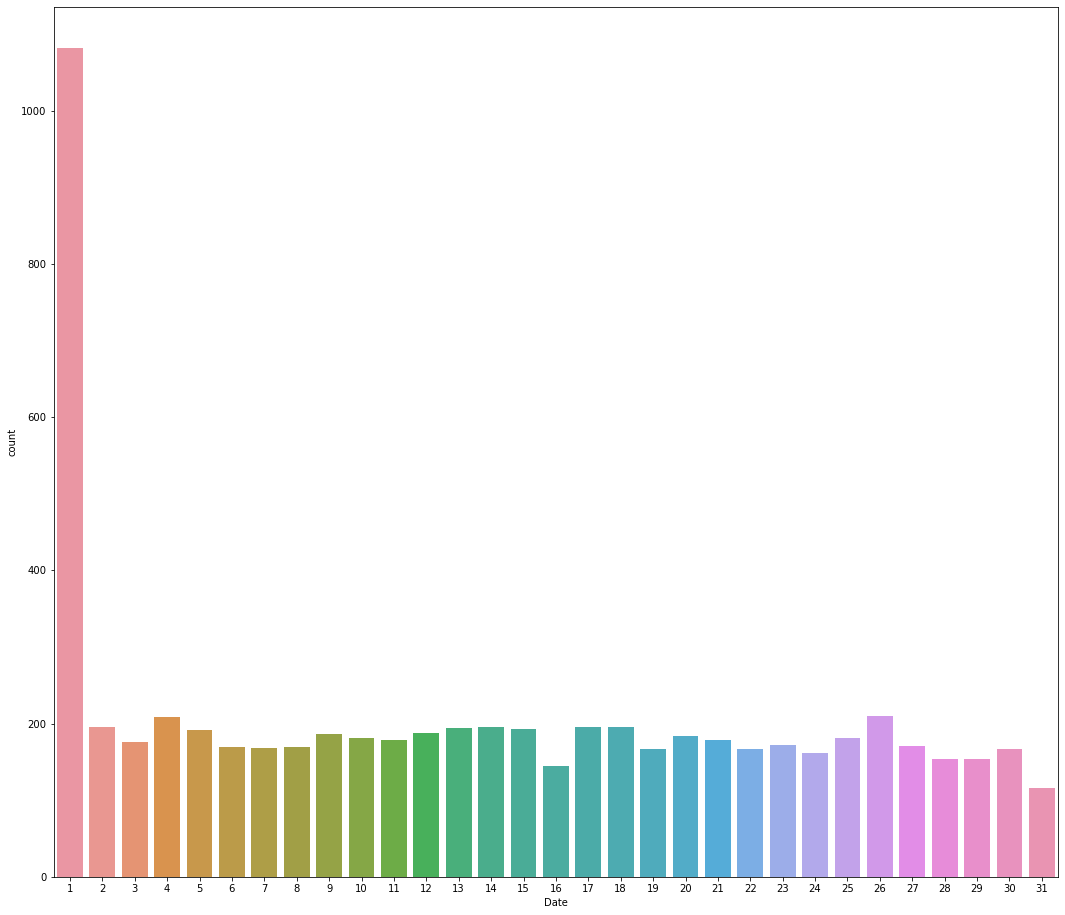

In [33]:
# Date wise reviews came.
plt.figure(figsize=(18,16))
sns.countplot(x='Date',data=df)

Result4: The 1st date of every month the reviews came maximum time.

Result5: Total no of reviews is : 6448

# Thank You